# A/B Case Study

A software company has launched a brand new software with the following setup - users can download and use the software for one week from the day of download absolutely free. After the end of the free trial, however, they are required to pay for a license to continue using the software. The company is trying to encourage more people to purchase their product. To achieve that the company wants to try out some changes in the present layout of the homepage - they want to emphasize more on the one week free trial option. The hope is that this will encourage more people to download and use the software initially for free and when they find the usability of the product they might consider to buy it.

In this notebook, we will perform an experiment to test whether the company should deploy this change or not. The goal of the experiment can be stated as follows :

*Modifying the structure of the homepage will encourage more people to download the software and then finally buy it.*

##  Constructing a user funnel

The first step to conduct an experiment is to build the user funnel. A **user funnel** is the series of steps that you expect a user to take when that user is on your website. The website has the following five main sections :

1. a homepage
2. a section with additional informations
3. a download page for the software
4. a page for users to purchase the license for the software
5. a support page for documantation and FAQs related to the software

The website requires the users to create an account at the time of downloading the software. When the free trial period ends, a dialogue box will appear on the user's screen taking them to the license page. Each user buying the software will receive a unique usedId associated with their accounts on the website. A user when on the company website is expected to follow the below steps :

1. visit the homepage
2. visit the download page
3. sign up for the account
4. download the software
5. after the free trial period, the software takes the user to the license page
6. purchase the software

The above steps form a user funnel. There will be dropoffs in the users who move from one step to the next step in the funnel with only a few making it to the end. That means the probability decreases as you go down in the user funnel. Also, the above user funnel is not a unique set of paths/steps taken by every user visiting that page, *e.g.*, a user might take some additional steps between any two consecutive steps shown above. But that won't affect the results of our experiment because our main focus is to bring more and more user to the download page, not on

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import stats
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv("homepage-experiment-data.csv")
df.tail()

,Day,Control Cookies,Control Downloads,Control Licenses,Experiment Cookies,Experiment Downloads,Experiment Licenses
24,25,1529,226,34,1609,284,29
25,26,1612,276,36,1574,295,38
26,27,1760,291,42,1666,297,28
27,28,1548,271,38,1587,314,37
28,29,1781,254,33,1728,290,41


In [6]:
avg_cookie_control = df['Control Cookies'].mean()
avg_cookie_exp = df['Experiment Cookies'].mean()

In [7]:
avg_cookie_control, avg_cookie_exp

(1615.551724137931, 1632.6206896551723)

In [18]:
df['Control Cookies'].sum(), df['Experiment Cookies'].sum()

(46851, 47346)

In [8]:
avg_cookie_diff = avg_cookie_exp - avg_cookie_control
avg_cookie_diff

17.068965517241395

In [9]:
diffs = []

for _ in range(10000):
    df_sample = df.sample(df.shape[0], replace=True)
    avg_cookie_control = df_sample['Control Cookies'].mean()
    avg_cookie_exp = df_sample['Experiment Cookies'].mean()
    avg_cookie_diff = avg_cookie_exp - avg_cookie_control
    diffs.append(avg_cookie_diff)

In [10]:
diffs = np.array(diffs)

In [11]:
obs_mean = diffs.mean()
obs_mean

16.91816206896552

In [12]:
null_mean = 0.
null_std = diffs.std()

In [13]:
null_sample = np.random.normal(loc=null_mean, scale=null_std, size=diffs.size)

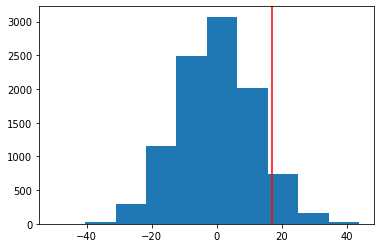

In [15]:
plt.hist(null_sample);
plt.axvline(obs_mean, color='red')

In [16]:
upper_bound = obs_mean
lower_bound = null_mean - (obs_mean - null_mean)
p_val = (null_sample > upper_bound).mean() + (null_sample < lower_bound).mean()
p_val

0.1585

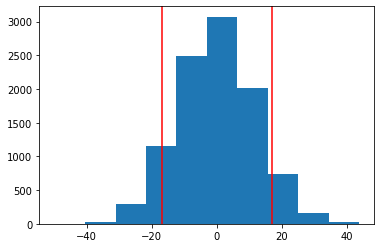

In [17]:
plt.hist(null_sample);
plt.axvline(upper_bound, color='red')
plt.axvline(lower_bound, color='red')

In [19]:
df.head()

,Day,Control Cookies,Control Downloads,Control Licenses,Experiment Cookies,Experiment Downloads,Experiment Licenses
0,1,1764,246,1,1850,339,3
1,2,1541,234,2,1590,281,2
2,3,1457,240,1,1515,274,1
3,4,1587,224,1,1541,284,2
4,5,1606,253,2,1643,292,3


In [20]:
dr_control = df['Control Downloads'].sum()/df['Control Cookies'].sum()
dr_exp = df['Experiment Downloads'].sum()/df['Experiment Cookies'].sum()
dr_control, dr_exp

(0.16123455209067042, 0.180543234908968)

In [21]:
dr_diff = dr_exp - dr_control
dr_diff

0.01930868281829759

In [22]:
diffs = []

for _ in range(10000):
    df_sample = df.sample(df.shape[0], replace=True)
    dr_control = df_sample['Control Downloads'].sum()/df_sample['Control Cookies'].sum()
    dr_exp = df_sample['Experiment Downloads'].sum()/df_sample['Experiment Cookies'].sum()
    dr_diff = dr_exp - dr_control
    diffs.append(dr_diff)

In [23]:
null_mean = 0.
null_std = np.array(diffs).std()
obs_mean = np.array(diffs).mean()
obs_mean

0.019320216582719443

In [25]:
null_sample = np.random.normal(loc=null_mean, scale=null_std, size=len(diffs))

In [29]:
null_std

0.0025884452376441287

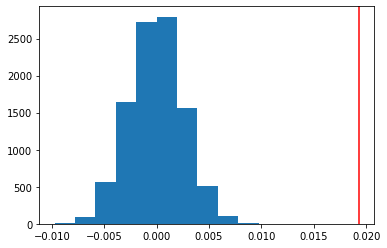

In [26]:
plt.hist(null_sample);
plt.axvline(obs_mean, color='red')

In [30]:
df.head()

,Day,Control Cookies,Control Downloads,Control Licenses,Experiment Cookies,Experiment Downloads,Experiment Licenses
0,1,1764,246,1,1850,339,3
1,2,1541,234,2,1590,281,2
2,3,1457,240,1,1515,274,1
3,4,1587,224,1,1541,284,2
4,5,1606,253,2,1643,292,3


In [31]:
lr_control = df['Control Licenses'].sum()/df['Control Cookies'].sum()
lr_experiment = df['Experiment Licenses'].sum()/df['Experiment Cookies'].sum()
lr_control, lr_experiment

(0.01515442573264178, 0.015460651374984159)

In [32]:
lr_diff = lr_experiment - lr_control
lr_diff

0.0003062256423423792

In [39]:
diffs = []

for _ in range(10000):
    df_sample = df.sample(df.shape[0], replace=True)
    lr_control = df_sample['Control Licenses'].sum()/df_sample['Control Cookies'][:21].sum()
    lr_experiment = df_sample['Experiment Licenses'].sum()/df_sample['Experiment Cookies'][:21].sum()
    lr_diff = lr_experiment - lr_control
    diffs.append(lr_diff)

In [40]:
null_mean = 0.
null_std = np.array(diffs).std()
obs_mean = np.array(diffs).mean()
obs_mean, null_std

(0.00043136390022743604, 0.000932184850314764)

In [41]:
null_sample = np.random.normal(loc=null_mean, scale=null_std, size=len(diffs))

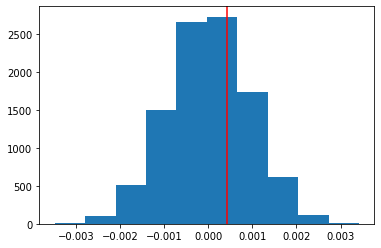

In [42]:
plt.hist(null_sample);
plt.axvline(obs_mean, color='red')

In [43]:
p_val = (null_sample > obs_mean).mean()
p_val

0.3297